# Data processing

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from cv2 import cv2

In [64]:
df = pd.read_csv('C:/Users/Marouane/Desktop/Master_DSBD/S3/PREDICTIVE ANALYSIS/courses/Automatic Number Plate Recognition/practise/1-data_labeling/CarsImagesLabeled.csv')
df

,filepath,xmin,xmax,ymin,ymax
0,./images\N1.xml,1095,1397,648,735
1,./images\N100.xml,132,302,305,351
2,./images\N101.xml,20,139,128,162
3,./images\N102.xml,162,317,208,250
4,./images\N103.xml,811,1069,671,728
...,...,...,...,...,...
222,./images\N95.xml,19,413,172,395
223,./images\N96.xml,119,369,134,196
224,./images\N97.xml,175,291,228,254
225,./images\N98.xml,565,673,209,236


In [65]:
df.head()

,filepath,xmin,xmax,ymin,ymax
0,./images\N1.xml,1095,1397,648,735
1,./images\N100.xml,132,302,305,351
2,./images\N101.xml,20,139,128,162
3,./images\N102.xml,162,317,208,250
4,./images\N103.xml,811,1069,671,728


In [66]:
import xml.etree.ElementTree as xet

In [68]:
def getfilename(filename):
    filename = xet.parse(filename).getroot().find('filename').text
    image_path = os.path.join('./images',filename)
    return image_path

In [67]:
filename = df['filepath'][0]
filename

'./images\\N1.xml'

In [69]:
directory = '../1-data_labeling/'
#filename = filename.replace('\\','/')
full_path = directory+filename[2:]
getfilename(full_path)

'./images\\N1.jpeg'

In [74]:
for i in range(len(df['filepath'])):
    df['filepath'][i] = directory + df['filepath'].iloc[i][2::]

<ipython-input-74-510dfcfb941f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filepath'][i] = directory + df['filepath'].iloc[i][2::]


In [75]:
df

,filepath,xmin,xmax,ymin,ymax
0,../1-data_labeling/images\N1.xml,1095,1397,648,735
1,../1-data_labeling/images\N100.xml,132,302,305,351
2,../1-data_labeling/images\N101.xml,20,139,128,162
3,../1-data_labeling/images\N102.xml,162,317,208,250
4,../1-data_labeling/images\N103.xml,811,1069,671,728
...,...,...,...,...,...
222,../1-data_labeling/images\N95.xml,19,413,172,395
223,../1-data_labeling/images\N96.xml,119,369,134,196
224,../1-data_labeling/images\N97.xml,175,291,228,254
225,../1-data_labeling/images\N98.xml,565,673,209,236


In [78]:
image_path = list(df['filepath'].apply(getfilename))
image_path

['./images\\N1.jpeg',
 './images\\N100.jpeg',
 './images\\N101.jpeg',
 './images\\N102.jpeg',
 './images\\N103.jpeg',
 './images\\N104.jpeg',
 './images\\N105.jpeg',
 './images\\N106.jpeg',
 './images\\N107.jpeg',
 './images\\N108.jpeg',
 './images\\N109.jpeg',
 './images\\N11.jpeg',
 './images\\N110.jpeg',
 './images\\N111.jpeg',
 './images\\N112.jpeg',
 './images\\N113.jpeg',
 './images\\N114.jpeg',
 './images\\N116.jpeg',
 './images\\N117.jpeg',
 './images\\N118.jpeg',
 './images\\N119.jpeg',
 './images\\N12.jpeg',
 './images\\N120.jpeg',
 './images\\N121.jpeg',
 './images\\N122.jpeg',
 './images\\N123.jpeg',
 './images\\N124.jpeg',
 './images\\N126.jpeg',
 './images\\N127.jpeg',
 './images\\N128.jpeg',
 './images\\N129.jpeg',
 './images\\N130.jpeg',
 './images\\N131.jpeg',
 './images\\N132.jpeg',
 './images\\N133.jpeg',
 './images\\N134.jpeg',
 './images\\N135.jpeg',
 './images\\N136.jpeg',
 './images\\N137.jpeg',
 './images\\N138.jpeg',
 './images\\N139.jpeg',
 './images\\N14.jpeg

verify image and output

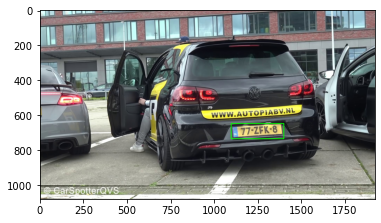

In [128]:
img = cv2.imread('../1-data_labeling/' + image_path[0][2:])
gg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pixels = np.array(gg)
cv2.rectangle(pixels,(df['xmin'][0], df['ymin'][0]), (df['xmax'][0], df['ymax'][0]), (0,255,0), 3)
plt.imshow(pixels)

In [117]:
"""img = cv2.imread('../1-data_labeling/images/N1.jpeg')
cv2.rectangle(img,(1095,648),(1397,735),(0,255,0),3)
plt.imshow(img)"""

"img = cv2.imread('../1-data_labeling/images/N1.jpeg')\ncv2.rectangle(img,(1095,648),(1397,735),(0,255,0),3)\nplt.imshow(img)"

In [118]:
"""img = cv2.imread(image_path[0])
cv2.imshow('exemple',img)
cv2.waitKey(0)
cv2.destroyAllWindows()"""

"img = cv2.imread(image_path[0])\ncv2.imshow('exemple',img)\ncv2.waitKey(0)\ncv2.destroyAllWindows()"

In [131]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [164]:
labels = df.iloc[:,1:].values

In [176]:
data = []
output = []
for ind in range(len(image_path)):
    image = '../1-data_labeling/' + image_path[ind][2:]
    image_arr = cv2.imread(image)
    w, h, d = image_arr.shape
    #preprocessing
    load_image = load_img(image, target_size=(224,224)) #displaying image in 224,224 
    load_image_arr = img_to_array(load_image) #converting the image to pixels
    norm_load_image_arr = load_image_arr/255.0 #normalization
    #normalization to labels
    xmin, xmax, ymin, ymax = labels[ind]
    nxmin, nxmax = xmin/w, xmax/w
    nymin, nymax = ymin/h, ymax/h
    label_norm = (nxmin, nxmax, nymin, nymax) #normalized output
    data.append(norm_load_image_arr)
    output.append(label_norm)

In [189]:
len(data), len(output)

(227, 227)

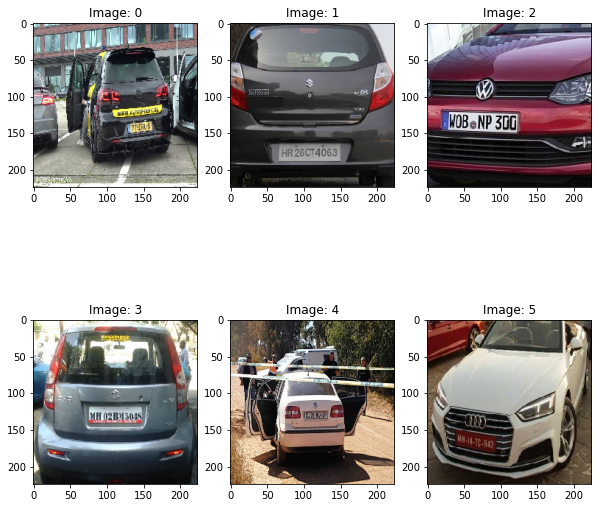

In [206]:
fig = plt.figure(figsize=(10, 10))
for i in range(6):
    fig.add_subplot(2, 3, i+1)
    plt.imshow(data[i])
    #plt.axis('off')
    plt.title("Image: "+str(i))

In [211]:
x = np.array(data, dtype=np.float32)
y = np.array(output, dtype=np.float32)

In [214]:
x.shape, y.shape
#for x.shape, 227: number of images, 224: size of width and height of the image (number of pixels), 3: rgb levels
#for y.shape, 227: number of image labels, 4: number of labels (xmin, xmax, ymin, ymax) 

((227, 224, 224, 3), (227, 4))

In [216]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((181, 224, 224, 3), (46, 224, 224, 3), (181, 4), (46, 4))

# Deep learning Model

In [218]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model
import tensorflow as tf

In [220]:
inception_resnet = InceptionResNetV2(weights="imagenet", include_top=False,
                                     input_tensor=Input(shape=(224,224,3)))
inception_resnet.trainable = False
headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(500,activation="relu")(headmodel)
headmodel = Dense(250,activation="relu")(headmodel)
headmodel = Dense(4, activation='sigmoid')(headmodel)
#model
model = Model(inputs=inception_resnet.input, outputs=headmodel)

219055592/219055592 [==============================] - 32s 0us/step


In [221]:
#compile model
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 96)  288         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 64)  192         ['conv2d_11[0][0]']              
 ormalizat

 activation_21 (Activation)     (None, 25, 25, 32)   0           ['batch_normalization_21[0][0]'] 
                                                                                                  
 conv2d_19 (Conv2D)             (None, 25, 25, 32)   10240       ['block35_1_ac[0][0]']           
                                                                                                  
 conv2d_22 (Conv2D)             (None, 25, 25, 48)   13824       ['activation_21[0][0]']          
                                                                                                  
 batch_normalization_19 (BatchN  (None, 25, 25, 32)  96          ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 48)  144         ['conv2d_22[0][0]']              
 ormalizat

                                                                                                  
 activation_24 (Activation)     (None, 25, 25, 32)   0           ['batch_normalization_24[0][0]'] 
                                                                                                  
 activation_26 (Activation)     (None, 25, 25, 32)   0           ['batch_normalization_26[0][0]'] 
                                                                                                  
 activation_29 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_29[0][0]'] 
                                                                                                  
 block35_3_mixed (Concatenate)  (None, 25, 25, 128)  0           ['activation_24[0][0]',          
                                                                  'activation_26[0][0]',          
                                                                  'activation_29[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_40 (BatchN  (None, 25, 25, 48)  144         ['conv2d_40[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_37 (Activation)     (None, 25, 25, 32)   0           ['batch_normalization_37[0][0]'] 
                                                                                                  
 activation_40 (Activation)     (None, 25, 25, 48)   0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 conv2d_36 (Conv2D)             (None, 25, 25, 32)   10240       ['block35_4_ac[0][0]']           
          

 block35_6_mixed (Concatenate)  (None, 25, 25, 128)  0           ['activation_42[0][0]',          
                                                                  'activation_44[0][0]',          
                                                                  'activation_47[0][0]']          
                                                                                                  
 block35_6_conv (Conv2D)        (None, 25, 25, 320)  41280       ['block35_6_mixed[0][0]']        
                                                                                                  
 block35_6 (Lambda)             (None, 25, 25, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 25, 25, 320)  0           ['block35_6[0][0]']              
          

 activation_58 (Activation)     (None, 25, 25, 48)   0           ['batch_normalization_58[0][0]'] 
                                                                                                  
 conv2d_54 (Conv2D)             (None, 25, 25, 32)   10240       ['block35_7_ac[0][0]']           
                                                                                                  
 conv2d_56 (Conv2D)             (None, 25, 25, 32)   9216        ['activation_55[0][0]']          
                                                                                                  
 conv2d_59 (Conv2D)             (None, 25, 25, 64)   27648       ['activation_58[0][0]']          
                                                                                                  
 batch_normalization_54 (BatchN  (None, 25, 25, 32)  96          ['conv2d_54[0][0]']              
 ormalization)                                                                                    
          

                                                                  'block35_9_conv[0][0]']         
                                                                                                  
 block35_9_ac (Activation)      (None, 25, 25, 320)  0           ['block35_9[0][0]']              
                                                                                                  
 conv2d_69 (Conv2D)             (None, 25, 25, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 batch_normalization_69 (BatchN  (None, 25, 25, 32)  96          ['conv2d_69[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_69 (Activation)     (None, 25, 25, 32)   0           ['batch_normalization_69[0][0]'] 
          

 activation_75 (Activation)     (None, 12, 12, 384)  0           ['batch_normalization_75[0][0]'] 
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 320)  0          ['block35_10_ac[0][0]']          
                                                                                                  
 mixed_6a (Concatenate)         (None, 12, 12, 1088  0           ['activation_72[0][0]',          
                                )                                 'activation_75[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_77 (Conv2D)             (None, 12, 12, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_nor

                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 12, 12, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_85 (Conv2D)             (None, 12, 12, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_85 (BatchN  (None, 12, 12, 128)  384        ['conv2d_85[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_93 (Conv2D)             (None, 12, 12, 128)  139264      ['block17_4_ac[0][0]']           
                                                                                                  
 batch_normalization_93 (BatchN  (None, 12, 12, 128)  384        ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_93 (Activation)     (None, 12, 12, 128)  0           ['batch_normalization_93[0][0]'] 
                                                                                                  
 conv2d_94 (Conv2D)             (None, 12, 12, 160)  143360      ['activation_93[0][0]']          
          

                                                                                                  
 batch_normalization_101 (Batch  (None, 12, 12, 128)  384        ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_101 (Activation)    (None, 12, 12, 128)  0           ['batch_normalization_101[0][0]']
                                                                                                  
 conv2d_102 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_101[0][0]']         
                                                                                                  
 batch_normalization_102 (Batch  (None, 12, 12, 160)  480        ['conv2d_102[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 activation_109 (Activation)    (None, 12, 12, 128)  0           ['batch_normalization_109[0][0]']
                                                                                                  
 conv2d_110 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_109[0][0]']         
                                                                                                  
 batch_normalization_110 (Batch  (None, 12, 12, 160)  480        ['conv2d_110[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_110 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_110[0][0]']
                                                                                                  
 conv2d_10

 conv2d_118 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_117[0][0]']         
                                                                                                  
 batch_normalization_118 (Batch  (None, 12, 12, 160)  480        ['conv2d_118[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_118 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_118[0][0]']
                                                                                                  
 conv2d_116 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_10_ac[0][0]']          
                                                                                                  
 conv2d_119 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_118[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_126 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_126[0][0]']
                                                                                                  
 conv2d_124 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_12_ac[0][0]']          
                                                                                                  
 conv2d_127 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_126[0][0]']         
                                                                                                  
 batch_normalization_124 (Batch  (None, 12, 12, 192)  576        ['conv2d_124[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_132 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_14_ac[0][0]']          
                                                                                                  
 conv2d_135 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_134[0][0]']         
                                                                                                  
 batch_normalization_132 (Batch  (None, 12, 12, 192)  576        ['conv2d_132[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_135 (Batch  (None, 12, 12, 192)  576        ['conv2d_135[0][0]']             
 Normalization)                                                                                   
          

 conv2d_143 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_142[0][0]']         
                                                                                                  
 batch_normalization_140 (Batch  (None, 12, 12, 192)  576        ['conv2d_140[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_143 (Batch  (None, 12, 12, 192)  576        ['conv2d_143[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_140 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_140[0][0]']
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_151 (Batch  (None, 12, 12, 192)  576        ['conv2d_151[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 activation_151 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_151[0][0]']
                                                                                                  
 block17_19_mixed (Concatenate)  (None, 12, 12, 384)  0          ['activation_148[0][0]',         
          

 activation_156 (Activation)    (None, 12, 12, 256)  0           ['batch_normalization_156[0][0]']
                                                                                                  
 activation_158 (Activation)    (None, 12, 12, 256)  0           ['batch_normalization_158[0][0]']
                                                                                                  
 activation_161 (Activation)    (None, 12, 12, 288)  0           ['batch_normalization_161[0][0]']
                                                                                                  
 conv2d_157 (Conv2D)            (None, 5, 5, 384)    884736      ['activation_156[0][0]']         
                                                                                                  
 conv2d_159 (Conv2D)            (None, 5, 5, 288)    663552      ['activation_158[0][0]']         
                                                                                                  
 conv2d_16

                                                                                                  
 activation_169 (Activation)    (None, 5, 5, 224)    0           ['batch_normalization_169[0][0]']
                                                                                                  
 conv2d_167 (Conv2D)            (None, 5, 5, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_170 (Conv2D)            (None, 5, 5, 256)    172032      ['activation_169[0][0]']         
                                                                                                  
 batch_normalization_167 (Batch  (None, 5, 5, 192)   576         ['conv2d_167[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 batch_normalization_175 (Batch  (None, 5, 5, 192)   576         ['conv2d_175[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_178 (Batch  (None, 5, 5, 256)   768         ['conv2d_178[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_175 (Activation)    (None, 5, 5, 192)    0           ['batch_normalization_175[0][0]']
                                                                                                  
 activation_178 (Activation)    (None, 5, 5, 256)    0           ['batch_normalization_178[0][0]']
                                                                                                  
 block8_4_

                                                                                                  
 activation_186 (Activation)    (None, 5, 5, 256)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 block8_6_mixed (Concatenate)   (None, 5, 5, 448)    0           ['activation_183[0][0]',         
                                                                  'activation_186[0][0]']         
                                                                                                  
 block8_6_conv (Conv2D)         (None, 5, 5, 2080)   933920      ['block8_6_mixed[0][0]']         
                                                                                                  
 block8_6 (Lambda)              (None, 5, 5, 2080)   0           ['block8_5_ac[0][0]',            
                                                                  'block8_6_conv[0][0]']          
          

                                                                                                  
 block8_8 (Lambda)              (None, 5, 5, 2080)   0           ['block8_7_ac[0][0]',            
                                                                  'block8_8_conv[0][0]']          
                                                                                                  
 block8_8_ac (Activation)       (None, 5, 5, 2080)   0           ['block8_8[0][0]']               
                                                                                                  
 conv2d_196 (Conv2D)            (None, 5, 5, 192)    399360      ['block8_8_ac[0][0]']            
                                                                                                  
 batch_normalization_196 (Batch  (None, 5, 5, 192)   576         ['conv2d_196[0][0]']             
 Normalization)                                                                                   
          

 )                                                                                                
                                                                                                  
 conv_7b_ac (Activation)        (None, 5, 5, 1536)   0           ['conv_7b_bn[0][0]']             
                                                                                                  
 flatten (Flatten)              (None, 38400)        0           ['conv_7b_ac[0][0]']             
                                                                                                  
 dense (Dense)                  (None, 500)          19200500    ['flatten[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 250)          125250      ['dense[0][0]']                  
                                                                                                  
 dense_2 (

# Training Model

In [222]:
from tensorflow.keras.callbacks import TensorBoard

In [223]:
tfb = TensorBoard('object_detection')

In [224]:
history = model.fit(x=x_train, y=y_train, batch_size=10, epochs=100, 
                   validation_data=(x_test, y_test), callbacks=[tfb])

Epoch 1/100
19/19 [==============================] - 67s 3s/step - loss: 0.1024 - val_loss: 0.0893
Epoch 2/100
19/19 [==============================] - 48s 3s/step - loss: 0.0840 - val_loss: 0.0717
Epoch 3/100
19/19 [==============================] - 48s 3s/step - loss: 0.0631 - val_loss: 0.0481
Epoch 4/100
19/19 [==============================] - 40s 2s/step - loss: 0.0478 - val_loss: 0.0466
Epoch 5/100
19/19 [==============================] - 36s 2s/step - loss: 0.0460 - val_loss: 0.0481
Epoch 6/100
19/19 [==============================] - 34s 2s/step - loss: 0.0439 - val_loss: 0.0501
Epoch 7/100
19/19 [==============================] - 31s 2s/step - loss: 0.0405 - val_loss: 0.0431
Epoch 8/100
19/19 [==============================] - 34s 2s/step - loss: 0.0390 - val_loss: 0.0414
Epoch 9/100
19/19 [==============================] - 38s 2s/step - loss: 0.0378 - val_loss: 0.0451
Epoch 10/100
19/19 [==============================] - 34s 2s/step - loss: 0.0375 - val_loss: 0.0419
Epoch 11/

19/19 [==============================] - 64s 3s/step - loss: 0.0342 - val_loss: 0.0392
Epoch 84/100
19/19 [==============================] - 78s 4s/step - loss: 0.0341 - val_loss: 0.0395
Epoch 85/100
19/19 [==============================] - 55s 3s/step - loss: 0.0341 - val_loss: 0.0389
Epoch 86/100
19/19 [==============================] - 68s 4s/step - loss: 0.0343 - val_loss: 0.0401
Epoch 87/100
19/19 [==============================] - 50s 3s/step - loss: 0.0345 - val_loss: 0.0411
Epoch 88/100
19/19 [==============================] - 51s 3s/step - loss: 0.0347 - val_loss: 0.0412
Epoch 89/100
19/19 [==============================] - 66s 4s/step - loss: 0.0372 - val_loss: 0.0417
Epoch 90/100
19/19 [==============================] - 57s 3s/step - loss: 0.0361 - val_loss: 0.0417
Epoch 91/100
19/19 [==============================] - 48s 3s/step - loss: 0.0352 - val_loss: 0.0405
Epoch 92/100
19/19 [==============================] - 51s 3s/step - loss: 0.0356 - val_loss: 0.0400
Epoch 93/100


In [225]:
#history = model.fit(x=x_train, y=y_train, batch_size=10, epochs=200, 
#                   validation_data=(x_test, y_test), callbacks=[tfb], initial_epoch = 101)
#model.save()